In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [37]:
def gen_output_t(a, t):
    final = []
    for t_val in t:
        total = 0
        for i in range(len(a)):
            temp = a[i] * (t_val**i)
            total += temp
        final.append(total)
    return final

def differentiate_a(a):
    a_new = [a[i] * i for i in range(len(a))]
    return a_new[1:]

In [15]:
tf = 5
t_cookie = 2  
t0 = 0
# To solve equation in the form M * a = b
# M array is constant across both x and y

M = [ [1, t0, t0**2, t0**3, t0**4],
        [0, 1, 2*t0, 3*t0**2, 4*t0**3],
        [1, tf**1, tf**2, tf**3, tf**4],
        [0, 1, 2*tf, 3*tf**2, 4*tf**3],
        [1, t_cookie, t_cookie**2, t_cookie**3, t_cookie**4]
    ]
M = np.array(M)

bx = np.array([3, 0, 9, 0, 1])
by = np.array([0, 0, 5, 0, 2.5])

Minv = np.linalg.inv(M)
ax = Minv @ bx
ay = Minv @ by

time = np.arange(0, 5.5, 0.1).tolist()


In [16]:
x = gen_output_t(ax, time)
y = gen_output_t(ay, time)

In [17]:
xi = 3
yi = 0
xf = 9
yf = 5
x_cookie = 1
y_cookie = 2.5

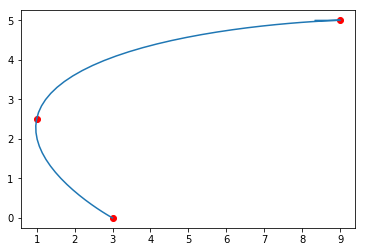

In [18]:
def plot(x,y):
    plt.figure()
    plt.plot(xi,yi, 'ro')
    plt.plot(xf,yf, 'ro')
    plt.plot(x_cookie,y_cookie, 'ro')
    plt.plot(x,y)
    plt.show()
plot(x,y)

In [19]:
diff_ax = differentiate_a(ax)
diff_ay = differentiate_a(ay)
x_vel = gen_output_t(diff_ax, time)
y_vel = gen_output_t(diff_ay, time)

<Figure size 432x288 with 0 Axes>

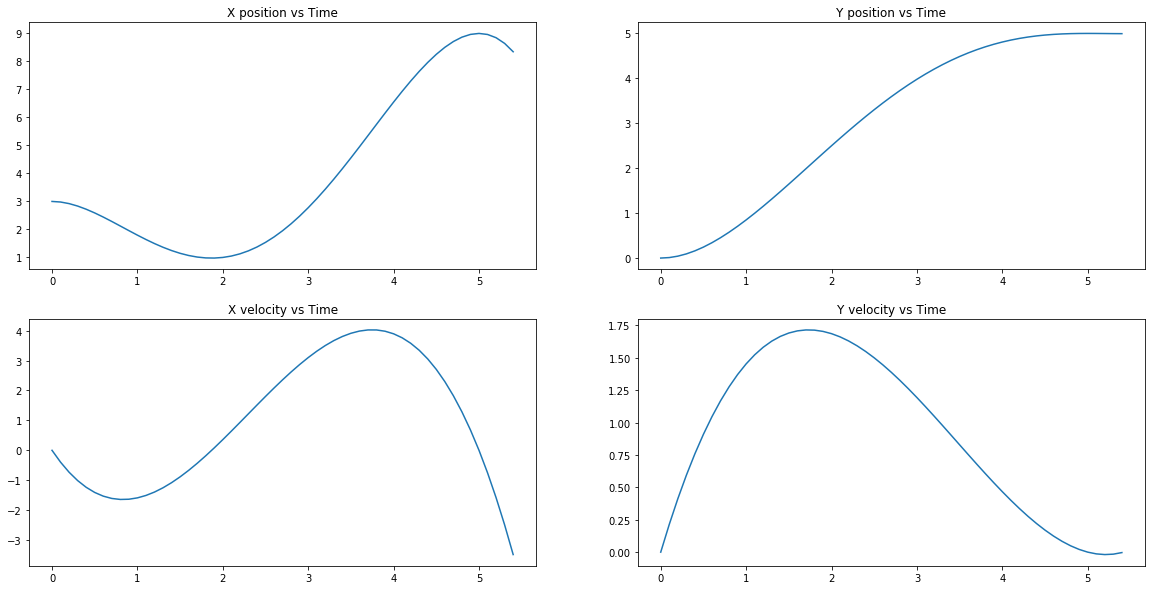

In [20]:
plt.figure()
figure(figsize=(20, 10))

plt.subplot(221)
plt.title("X position vs Time")
plt.plot(time, x)

plt.subplot(222)
plt.title("Y position vs Time")
plt.plot(time, y)

plt.subplot(223)
plt.title("X velocity vs Time")
plt.plot(time, x_vel) 

plt.subplot(224)
plt.title("Y velocity vs Time")
plt.plot(time, y_vel) # y velocity vs time

## Bernstein Polynomial

In [21]:
def nCr(n, r): 
    return (fact(n) / (fact(r)  * fact(n - r))) 
  
def fact(n): 
    res = 1
    for i in range(2, n+1): 
        res = res * i 
    return res 

# Reference: http://graphics.cs.ucdavis.edu/education/CAGDNotes/Bernstein-Polynomials.pdf
# Similar Reference: https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.897.2894&rep=rep1&type=pdf 
def calc_bernstein(i, j, n):
    temp = (-1) ** (i-j)
    return temp * nCr(n, i) * nCr(i, j)

def make_bern(n):
    mat = []
    for i in range(n+1):
        temp = []
        for j in range(n+1):
            if i<j:
                temp.append(0)
            else:
                temp.append(calc_bernstein(i, j, n))
        mat.append(temp)
    return np.array(mat)

# B(t) = [1 t t^2...t^n] * make_bern(n) * [c0 c1 c2...cn] = [b0 b1 b2..bn]

In [28]:
poly_5 = make_bern(5)
def eval_pos(poly_5, t):
    temp = []
    for i in range(6):
        val = 0
        for j in range(6):
            val += poly_5[j][i] * t **j
        temp.append(val)
    return temp

def eval_vel(poly_5, t):
    temp = []
    for i in range(6):
        val = 0
        for j in range(6):
            if j-1 < 0:
                val += 0
            else: 
                val += j * poly_5[j][i] * t **(j-1)
        temp.append(val)
    return temp

def eval_acc(poly_5, t):
    temp = []
    for i in range(6):
        val = 0
        for j in range(6):
            if j-2 < 0:
                val += 0
            else:
                val += j * (j-1) * poly_5[j][i] * t **(j-2)
        temp.append(val)
    return temp

In [29]:
# at time 0, coefficients?
M = []
bx = []
by = []

coefs1 = eval_pos(poly_5, 0)
bx.append(3)
by.append(0)
M.append(coefs1)
flex_point_time = 2

coefs2 = eval_pos(poly_5, flex_point_time)
bx.append(1)
by.append(2.5)
M.append(coefs2)

coefs3 = eval_pos(poly_5, 5)
bx.append(9)
by.append(5)
M.append(coefs3)

coefs4 = eval_vel(poly_5, 0)
bx.append(0)
by.append(0)
M.append(coefs4)

coefs5 = eval_vel(poly_5, 5)
bx.append(0)
by.append(0)
M.append(coefs5)

coefs6 = eval_acc(poly_5, 5)
bx.append(0)
by.append(0)
M.append(coefs6)

In [30]:
M = np.array(M)
bx = np.array(bx)
by = np.array(by)
cx = np.linalg.inv(M) @ bx.T
cy = np.linalg.inv(M) @ by.T

In [31]:
def output_pos(poly_5, c, t):
    return np.array(eval_pos(poly_5, t)) @ c.T
def output_vel(poly_5, c, t):
    return np.array(eval_vel(poly_5, t)) @ c.T
def output_acc(poly_5, c, t):
    return np.array(eval_acc(poly_5, t)) @ c.T

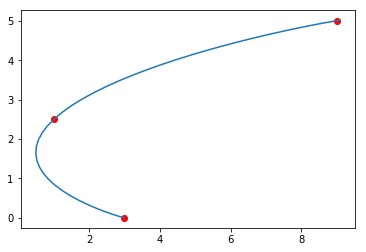

In [32]:
x = [output_pos(poly_5, cx, t) for t in time]
y = [output_pos(poly_5, cy, t) for t in time]

plot(x,y)

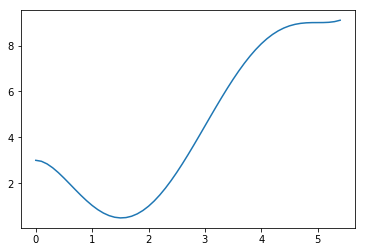

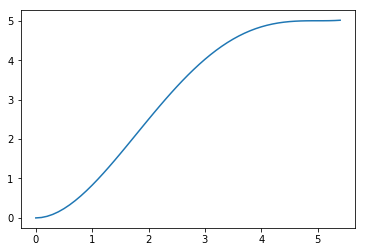

In [33]:
plt.plot(time, x) # Position x
plt.show()
plt.plot(time, y) # Position y
plt.show()

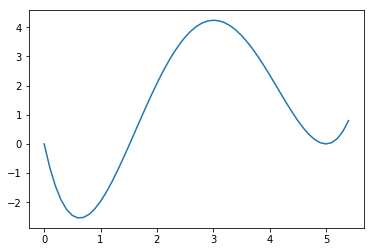

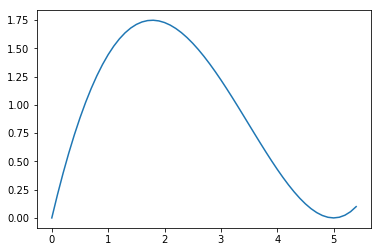

In [34]:
x = [output_vel(poly_5, cx, t) for t in time]
y = [output_vel(poly_5, cy, t) for t in time]
plt.plot(time, x) # Vel x
plt.show()
plt.plot(time, y) # Vel y
plt.show()

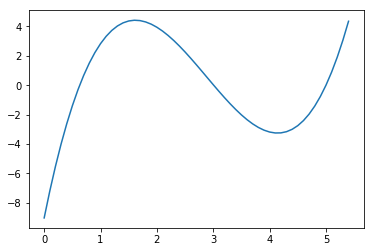

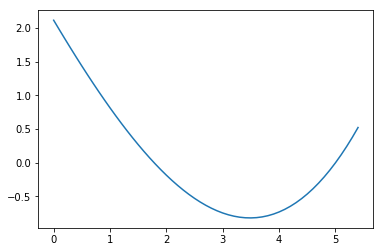

In [35]:
x = [output_acc(poly_5, cx, t) for t in time]
y = [output_acc(poly_5, cy, t) for t in time]
plt.plot(time, x) # Acc x
plt.show()
plt.plot(time, y) # Acc y
plt.show()

In [36]:
print(M)

[[ 1.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]
 [-1.0000e+00  1.0000e+01 -4.0000e+01  8.0000e+01 -8.0000e+01  3.2000e+01]
 [-1.0240e+03  6.4000e+03 -1.6000e+04  2.0000e+04 -1.2500e+04  3.1250e+03]
 [-5.0000e+00  5.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00]
 [-1.2800e+03  7.6800e+03 -1.8400e+04  2.2000e+04 -1.3125e+04  3.1250e+03]
 [-1.2800e+03  7.3600e+03 -1.6880e+04  1.9300e+04 -1.1000e+04  2.5000e+03]]
